In [24]:
# In assignment one, we are introduced to Object-Oriented Programming(OOP)
# This is crucial because TensorFlow and PyTorch are entirely object-based. 
# Every Model, Layer, and optimizer is a class.
# I'll learn how to define my own class, and the difference between Attributes(data)
# and methods (functions)
#I will also leaen the meaning of self and how to create, modify, and use these objects
# %pip install numpy
#%pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt


In [25]:
# Here is an example of that logic:

class Student:
    def __init__(self, name, major):
        self.name = name
        self.major = major

    def greet(self):
        return f"Hello, I'm {self.name} and I'm styding {self.major}."
        
# the "__innit__" is the constructor that runs automatically when you create a new object

# the "self" represents this instance of the class (reference to the current object)

# Student("Brandon", "Data Science") creates a unique object with its own data. 

# Methods = class-specific functons

# Attributes = data stored in each instance
        

In [26]:

# In this example, we'll be creating a car class with attributes

#It is important to remember that the "self," and the "__innit__" function aren't their 
# own pre-loaded functions from Python, these are just placeholders to represent a purpose

class Car:
    def __init__(self, make, model, year):
        self.make = make
        self.model = model
        self.year = year

    def describe(self):
        return f"{self.year} {self.make} {self.model}"

    def start_engine(self):
        return f"The {self.model}'s engine is now running."


In [27]:
# In this block, we'll create a subclass (electric car) to describe

class ElectricCar(Car):  # inherits from Car
    def __init__(self, make, model, year, battery_size):
        super().__init__(make, model, year)  # correctly call parent constructor
        self.battery_size = battery_size     # add a unique attribute

    def describe_battery(self):
        return f"This car has a {self.battery_size}-kWh battery."

    def start_engine(self):  # override parent method
        return f"The {self.model} starts silently — it's electric!"
      

In [28]:
# In this block, we will run some use cases of the given function.

my_car = Car("Toyota", "4Runner", 2003)
print(my_car.describe())
print(my_car.start_engine())

my_tesla = ElectricCar("Tesla", "Model S", 2024, 100)
print(my_tesla.describe())
print(my_tesla.describe_battery())
print(my_tesla.start_engine())

2003 Toyota 4Runner
The 4Runner's engine is now running.
2024 Tesla Model S
This car has a 100-kWh battery.
The Model S starts silently — it's electric!


In [29]:
# This matters because deep learning frameworks use OOP everywhere. 
# model = Sequential() -> create an object
# model.add(Dense(....)) -> method calls
# model.trainable_variables -> object attributes

# Understanding OOP lets us read and customize deep learning code with confidence 

In [30]:
# for as1.ipynb, this introduces linear models (like perceptron or logistic regression),
# and their learning rule. 

# Here, we are initializing all the variables we need for the perceptron.

import numpy as np

# 1️⃣ Input data (features) recall the perceptron worksheet, these are the original X's and Y's
# that we are trying to guess
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# 2️⃣ Target output (labels)
y = np.array([0, 0, 0, 1])  # AND gate

# 3️⃣ Hyperparameters
num_epochs = 10      # number of passes through the dataset
eta = 0.1            # learning rate

# 4️⃣ Initialize weights and bias
w = np.zeros(X.shape[1])  # same number of weights as features (2 inputs → 2 weights)
b = 0                     # start bias at zero

# 5️⃣ Step activation function
def step(z):
    return 1 if z >= 0 else 0




 


In [31]:
# The goal here is to understand: 
# how input weights, and bias combine to produce an output
# how a loss function quantifies error
# how weights are updated using the learning rule
# Below is an example of that logic(typical perceptron training loop):

for epoch in range(num_epochs):
    
# Each epoch means one full pass through all training examples
    
    for x, target in zip(X, y):
# 'x' in this instance is a single training example, like [0, 1]
# 'target' is the correct label for that example, like 0 or 1
# zip(X, y) pairs each input vector with its true output

# Step 1: Compute the weighted sum (the neuron input)
        y_pred = np.dot(x, w) + b
# np.dot(x, w) = x1*w1 + x2*w2 + ... + xn*wn
# b = bias term (acts like an intercept)
# The result (y_pred) is the neuron's raw output to 0 or 1 (activation)

# Step 2: Compute the error between actual and predicted output 
        error = target - step(y_pred)
# 'step(y_pred)' converts the raw output to 0 or 1 (activation)
        # If prediction is correct, error = 0
        # If prediction is wrong, error = 1 
# Positive error means we predicted too low an increase in weights
# Negative error means we predicted too high, decrease weights

# Step 3: Update the weights
        w += eta * error * x
# this is the perceptron learning rule:
    # new_weight = old_weight + (learning_rate * error * input)
# If the prediction was correct (error = 0), weights don't change.
# If we underpredicted, the weight increases toward the correct direction
# If we overpredicted, weights decrease. 
        
# Step 4: Update the bias term
        b += eta * error
# Bias shifts the decision boundary left/right (independent of input)
# Updated using the same rule but without multiplying by x. 

In [32]:
# Key Ideas

# Inputs (X) are multiplied by weights (w)
# Add a bias (b)
# Pass through activation function (step or sigmoid)
# Compute Error
# Adjust weights using learning rate "eta"

# Concepts

#output=activation(weighted_sum)
#perceptron rule:
# wj=wj+η×(y−y^)*x^j  







In [33]:
# Now for section 3, we'll learn how to make a perceptron from scratch. 

#Here, we learn the difference between a perceptron and an Adaline (ADAptive LInear NEuron)

# Activation - Step Function - Linear (before threshold)

# Learning - based on classification error - Based on continuous loss (MSE)

# Optimization - Rule Based - Gradient Descent 

In [38]:
num_iters = 200 # number of weight updates
costs = [] #creates empty list to track cost history
for i in range(num_iters):
    net_input = np.dot(X, w) + b
    output = net_input
    errors = y - output
    w += eta * X.T.dot(errors)
    b += eta * errors.sum()
    cost = (errors**2).sum() / 2.0
    costs.append(cost) #stores the cost after every weight update

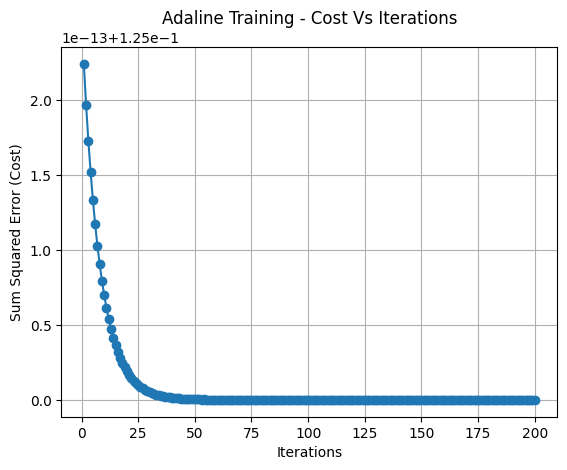

In [41]:
# Here, we use matplotlib to plot cost vs epochs
plt.plot(range(1, num_iters +1), costs, marker = 'o') # Plots iteration number vs cost
plt.title("Adaline Training - Cost Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Sum Squared Error (Cost)")
plt.grid(True)
plt.show()

In [ ]:
# Adaline uses continuous outputs, which are better for convergence

# Cost function = Mean Squared Error (MSE)

# Gradient Descent adjusts weights based on slope of error curve

# Too big of a learning rate too lead to oscillation
# If this rate is too small, it leads to a slow learning rate